In [7]:
# KoNLPY 설치하기
!pip install konlpy 

'국민청원 데이터' 삽입 - 교수님 자료와 다름

전체 행 중에서 5%는 임의 필드 1개에 결측치 삽입
범주(category)가 '육아/교육'이고 투표수(votes)가 50건 초과이면 20% 확률로 투표수에 결측치 넣기
나머지는 전체 데이터와 동일

In [8]:
# Pandas 라이브러리 불러오기 
import pandas as pd 

In [9]:
# 국민청원 데이터 불러오기
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_corrupted.csv', parse_dates=['start', 'end'])

In [10]:
# print the dataframe
df

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9.0,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17.0,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0.0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53.0,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0.0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
...,...,...,...,...,...,...,...,...
360979,469551,2018-12-14,2019-01-13,0,0.0,기타,''.. 뭐 다 지난일인디..,(전북 전주):사촌 여동생을 6년간 성폭행\nhttp://news.nate.com/...
360980,469552,2018-12-14,2019-01-13,0,2.0,기타,여기 홈페이지 로그아웃 어떻게 하나요??,청원 동의하려고 잠깐 페북으로 로그인 했는데 아무리 찾아봐도 로그아웃 버튼이 아무 ...
360981,469556,2018-12-14,2019-01-13,0,7.0,육아/교육,우리나라 학생들리 좌절감을 느끼지 않게해주세요,안녕하세요 저는 고3 언니가 있고 전주에 사는 평범한 중학생입니다.\n저에게는 고등...
360982,469558,2018-12-14,2019-01-13,0,15.0,저출산/고령화대책,강원도 육아기본수당,현재 강원도에 거주하고 있는 신혼부부입니다.\n강원도 기본육아수당과 관련해서 부정적...


In [11]:
# 형태소 분석
from konlpy.tag import Okt
from collections import Counter

# 명사 카운터 만들기
def count_noun_okt(lines):
  okt = Okt() 
  counts = Counter()
  for line in lines:
    tags = okt.pos(line, stem=True) 
    for morph, tag in tags:
      if tag == 'Noun': 
        counts[morph] += 1
  return counts

보건복지 분야

In [12]:
df_pol = df[(df.category=='보건복지') & (df.votes > 100)]
df_pol.head()

,article_id,start,end,answered,votes,category,title,content
88,112,2017-08-20,2017-11-18,0,1391.0,보건복지,여가부 산하 해바라기센터 심리치료사 자격기준 강화필요,저는 여가부 산하 해바라기센터 심리치료사의 부적절한 자격 요건 에 대한\n규정 수정...
141,165,2017-08-21,2017-09-05,0,428.0,보건복지,"농인(청각장애인) 수어통역지원서비스 지원체계를 위한 ""수어통역센터 중앙지원본부"" ...",존경하고 대통령님께 청원합니다.\n제4차 장애인정책종합계획은 각부처 합동으로 계획되...
186,211,2017-08-21,2017-11-19,0,180.0,보건복지,산정특례,안녕하세요\n저는 11살 소아암아이의 엄마 민지애입니다\n아직도 끝나지않는 검사와 ...
243,268,2017-08-22,2017-08-29,0,131.0,보건복지,6.25전몰군경유자녀는 모두 동일한 평등한 대우를 받아야 합니다.,늦더위와 일기불순한 요즈음 건강하시고 안녕히 지내시는지요.\n우리는 6.25전몰군경...
581,609,2017-08-26,2017-11-24,0,442.0,보건복지,노인장기요양보험 정상화 촉구,"호 소 문\n한국노인복지중앙회, 한국노인장기요양기관협회, 한국재가노인복지협회, 한국..."


In [13]:
# 명사 카운터 불러오기
text_okt = []
for content in df_pol.content:
  text_okt.append(content)
noun_okt = count_noun_okt(text_okt)
print (noun_okt.most_common())

[('것', 2805), ('병원', 2369), ('수', 2293), ('국민', 1707), ('환자', 1627), ('이', 1497), ('그', 1474), ('치료', 1468), ('아이', 1348), ('의료', 1327), ('생각', 1120), ('저', 1103), ('사람', 1056), ('등', 1020), ('말', 952), ('제', 939), ('보험', 937), ('일', 922), ('의사', 891), ('더', 882), ('대한', 811), ('국가', 784), ('건강', 770), ('위해', 762), ('시간', 761), ('교사', 754), ('및', 753), ('지원', 738), ('위', 723), ('간호사', 714), ('우리', 701), ('정부', 701), ('때', 698), ('문제', 693), ('현재', 672), ('어린이집', 666), ('경우', 658), ('수술', 658), ('비', 650), ('저희', 645), ('상황', 609), ('때문', 596), ('가족', 594), ('법', 577), ('중', 573), ('후', 571), ('사회', 564), ('지금', 550), ('정책', 548), ('돈', 548), ('이상', 521), ('청원', 486), ('대해', 484), ('약', 484), ('또한', 475), ('복지', 469), ('명', 468), ('운영', 464), ('보육', 451), ('모든', 445), ('왜', 445), ('곳', 438), ('가정', 438), ('근무', 436), ('대한민국', 433), ('알', 432), ('외국인', 432), ('못', 426), ('나라', 425), ('현실', 425), ('전', 425), ('사용', 421), ('진료', 416), ('다른', 412), ('기관', 402), ('대통령', 402), ('분', 399), ('제

In [14]:
# 스탑워즈 추가하기
stopwords = ['것','이','그','수','등','일','말','위','더','위해','제','때','및','저','전']
for word, freq in list(noun_okt.items()):
  if (word in stopwords) | (freq <= 10):
    del noun_okt[word]
print (noun_okt.most_common())

[('병원', 2369), ('국민', 1707), ('환자', 1627), ('치료', 1468), ('아이', 1348), ('의료', 1327), ('생각', 1120), ('사람', 1056), ('보험', 937), ('의사', 891), ('대한', 811), ('국가', 784), ('건강', 770), ('시간', 761), ('교사', 754), ('지원', 738), ('간호사', 714), ('우리', 701), ('정부', 701), ('문제', 693), ('현재', 672), ('어린이집', 666), ('경우', 658), ('수술', 658), ('비', 650), ('저희', 645), ('상황', 609), ('때문', 596), ('가족', 594), ('법', 577), ('중', 573), ('후', 571), ('사회', 564), ('지금', 550), ('정책', 548), ('돈', 548), ('이상', 521), ('청원', 486), ('대해', 484), ('약', 484), ('또한', 475), ('복지', 469), ('명', 468), ('운영', 464), ('보육', 451), ('모든', 445), ('왜', 445), ('곳', 438), ('가정', 438), ('근무', 436), ('대한민국', 433), ('알', 432), ('외국인', 432), ('못', 426), ('나라', 425), ('현실', 425), ('사용', 421), ('진료', 416), ('다른', 412), ('기관', 402), ('대통령', 402), ('분', 399), ('제도', 395), ('정말', 395), ('센터', 392), ('검사', 390), ('이유', 390), ('내', 377), ('관련', 377), ('장애', 374), ('원장', 371), ('상태', 369), ('관리', 362), ('장애인', 358), ('안', 355), ('혜택', 351), ('국민연금', 

In [15]:
# CSV로 출력하기
import csv

with open("request_politics.csv", "w", newline="") as f:
  writer = csv.writer(f)
  #writer.writerow(['단어','빈도'])
  writer.writerows(noun_okt.items())

In [16]:
# Install Korean font
# Colab

# Install font
!apt-get install fonts-nanum* -qq
# Set the font path
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path, size=9)
plt.rc('font', family='NanumGothic')
fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


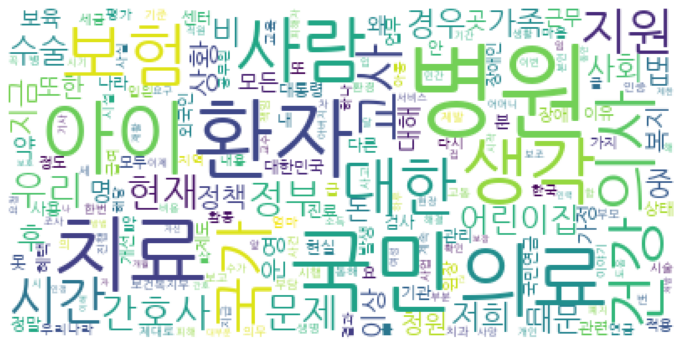

In [17]:
# Draw WordCloud
%matplotlib inline
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

cloud_noun = WordCloud(font_path=font_path, background_color='white') 
cloud_noun = cloud_noun.fit_words(noun_okt)
plt.figure(figsize=(12,9)) 
plt.axis('off') 
plt.imshow(cloud_noun) 
plt.show()

일자리 분야

In [18]:
df_edu = df[(df.category=='일자리') & (df.votes > 100)]
df_edu.head()

,article_id,start,end,answered,votes,category,title,content
28,50,2017-08-19,2017-10-18,0,1251.0,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...
32,54,2017-08-19,NaT,0,144.0,일자리,공정한 기회 균등이 보장되는 사회,안녕하십니까.저는 인천에서 지방으로 전출을 희망하는 별거 부부이자 중등교사입니다. ...
38,61,2017-08-19,2017-08-26,0,1185.0,일자리,영어회화전문강사제도는 유지되어야합니다.,1. 영전강의고용안정을 원합니다\n2.1년단위계약직으로 임신 출산육아 매우 곤란합니...
39,62,2017-08-20,2017-09-04,0,291.0,일자리,기간제 및 강사 정규직 무기직화 반대합니다.,"기간제 및 강사 정규직, 무기직 전환부분은 평등한 기회, 공정한 과정, 정의로운 결..."
66,89,2017-08-20,2017-11-18,0,1101.0,일자리,고용노동부 일반상담원 처우개선을 위한 예산편성 촉구 청원서,문재인정부 출범 100일을 맞이하는 기자회견이 8월17일 청와대에서 열리고 지지율은...


In [19]:
# 명사 카운터 불러오기
text_okt = []
for content in df_edu.content:
  text_okt.append(content)
noun_okt = count_noun_okt(text_okt)
print (noun_okt.most_common())

[('것', 1735), ('수', 991), ('일', 915), ('이', 808), ('제', 740), ('회사', 705), ('그', 677), ('저', 663), ('생각', 652), ('등', 631), ('사람', 628), ('직원', 627), ('근무', 612), ('말', 586), ('저희', 557), ('고용', 538), ('업무', 532), ('정부', 518), ('및', 500), ('문제', 467), ('시간', 464), ('국민', 462), ('채용', 460), ('일자리', 459), ('근로자', 452), ('업체', 448), ('정규직', 443), ('위해', 441), ('더', 428), ('시험', 424), ('계약', 418), ('우리', 394), ('노동자', 368), ('위', 367), ('전환', 366), ('대한', 362), ('사업', 361), ('대통령', 360), ('상황', 359), ('현재', 359), ('명', 355), ('경우', 345), ('때문', 344), ('장애인', 343), ('공무원', 340), ('또한', 326), ('지금', 321), ('직', 304), ('이상', 300), ('때', 295), ('기업', 294), ('법', 294), ('관리', 293), ('교육', 288), ('취업', 287), ('청원', 283), ('임금', 277), ('지원', 276), ('정책', 270), ('지역', 269), ('비정규직', 268), ('기간', 255), ('한국', 255), ('이유', 249), ('국가', 248), ('모두', 236), ('분', 234), ('운영', 230), ('중', 229), ('교사', 227), ('기사', 225), ('돈', 225), ('사회', 223), ('못', 223), ('안전', 223), ('관련', 220), ('정말', 219), ('글', 21

In [20]:
# 스탑워즈 추가하기
stopwords = ['것','이','그','수','등','일','말','위','더','위해','제','때','및','저','전']
for word, freq in list(noun_okt.items()):
  if (word in stopwords) | (freq <= 10):
    del noun_okt[word]

In [21]:
# CSV로 출력하기
import csv

with open("request_education.csv", "w", newline="") as f:
  writer = csv.writer(f)
  #writer.writerow(['단어','빈도'])
  writer.writerows(noun_okt.items())

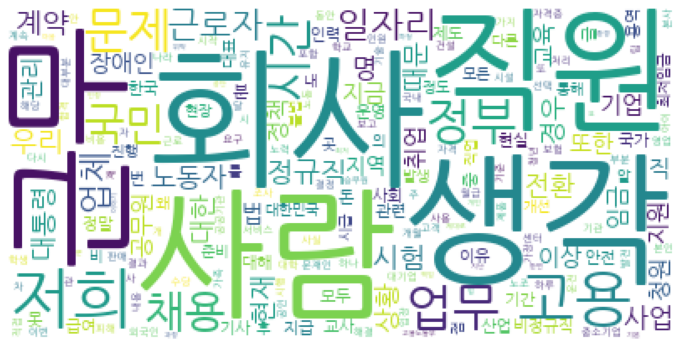

In [22]:
# Draw WordCloud
%matplotlib inline
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

cloud_noun = WordCloud(font_path=font_path, background_color='white') 
cloud_noun = cloud_noun.fit_words(noun_okt)
plt.figure(figsize=(12,9)) 
plt.axis('off') 
plt.imshow(cloud_noun) 
plt.show()